## Projeto 2 - SCC0270 - Redes Neurais e Aprendizado Profundo

### Nome: Nilo Conrado Messias Alves Cangerana
### Número USP: 9805362

In [1]:
#Imports
import platform
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential
import numpy as np
from matplotlib import pyplot as plt
import collections
from scipy.io import loadmat
from skimage.util import random_noise
from tensorflow.keras.utils import to_categorical

In [2]:
print("Versão Python utilizada: ",platform.python_version())
print("Versão Keras: ",tf.keras.__version__)
print("Versão Tensorflow: ",tf.__version__)
print("Número de GPUs Disponiveis: ", len(tf.config.list_physical_devices('GPU')))

Versão Python utilizada:  3.7.9
Versão Keras:  2.5.0
Versão Tensorflow:  2.5.0
Número de GPUs Disponiveis:  1


## Questão 1

In [3]:
#Função que cria o modelo
def criarModelo():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    return model

In [7]:
#Mostrar summary do modelo criado
m=criarModelo()
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9

## Questão 2

In [9]:
#DATASET: CIFAR-10

#Carregar dataset CIFAR-10
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

In [10]:
#Shape do dataset carregado
print('X_train_cifar shape:', X_train_cifar.shape)
print('y_train_cifar shape:', y_train_cifar.shape)
print('X_test_cifar shape:', X_test_cifar.shape)
print('y_test_cifar shape:', y_test_cifar.shape)

X_train_cifar shape: (50000, 32, 32, 3)
y_train_cifar shape: (50000, 1)
X_test_cifar shape: (10000, 32, 32, 3)
y_test_cifar shape: (10000, 1)


In [11]:
#Remover dimensão de y_train_cifar e y_test_cifar
y_train_cifar=np.squeeze(y_train_cifar)
y_test_cifar=np.squeeze(y_test_cifar)

In [12]:
#Reescalar pixels de [0,255] para [0,1]
X_train_cifar = X_train_cifar/255.0
X_test_cifar = X_test_cifar/255.0

In [13]:
#transformar em float32
X_train_cifar = np.float32(X_train_cifar)
X_test_cifar = np.float32(X_test_cifar)

In [14]:
print('X_train_cifar shape:', X_train_cifar.shape)
print('y_train_cifar shape:', y_train_cifar.shape)
print('X_test_cifar shape:', X_test_cifar.shape)
print('y_test_cifar shape:', y_test_cifar.shape)
print('\n')
print('X_train_cifar valor máximo:', np.max(X_train_cifar))
print('X_train_cifar valor mínimo:', np.min(X_train_cifar))
print('X_test_cifar valor máximo:', np.max(X_test_cifar))
print('X_test_cifar valor mínimo:', np.min(X_test_cifar))
print('\n')
print('Valores das classes em y_train_cifar:',np.unique(y_train_cifar))
print('Valores das classes em y_test_cifar:',np.unique(y_test_cifar))

X_train_cifar shape: (50000, 32, 32, 3)
y_train_cifar shape: (50000,)
X_test_cifar shape: (10000, 32, 32, 3)
y_test_cifar shape: (10000,)


X_train_cifar valor máximo: 1.0
X_train_cifar valor mínimo: 0.0
X_test_cifar valor máximo: 1.0
X_test_cifar valor mínimo: 0.0


Valores das classes em y_train_cifar: [0 1 2 3 4 5 6 7 8 9]
Valores das classes em y_test_cifar: [0 1 2 3 4 5 6 7 8 9]


In [15]:
#Contar ocorrências de cada classe nos conjuntos de treino e teste
count_train_cifar = collections.Counter(y_train_cifar)
count_test_cifar = collections.Counter(y_test_cifar)

In [16]:
qtd_train_cifar=sorted(count_train_cifar.items())
qtd_test_cifar=sorted(count_test_cifar.items())
print('Quantidade de imagens por classe no conjunto de treino: ',qtd_train_cifar)
print('Quantidade de imagens por classe no conjunto de teste: ',qtd_test_cifar)

Quantidade de imagens por classe no conjunto de treino:  [(0, 5000), (1, 5000), (2, 5000), (3, 5000), (4, 5000), (5, 5000), (6, 5000), (7, 5000), (8, 5000), (9, 5000)]
Quantidade de imagens por classe no conjunto de teste:  [(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000)]


#### Para o dataset CIFAR-10:
Observando o shape de X_train_cifar e X_test_cifar:
<br>Quantidade de imagens de treino: 50000
<br>Quantidade de imagens de teste: 10000
<br>Tamanho das imagens: 32 pixels por 32 pixels por 3 canais (32x32x3)

Observando a contagem realizada, o dataset é balanceado. O dataset possui 10 classes.
<br>No conjunto de treino, todas as classes possuem 5000 imagens cada, portanto cada classe possui 10% de imagens do total (50000). 
<br>No conjunto de teste, todas as classes possuem 1000 imagens cada, portanto cada classe possui 10% de imagens do total (10000).

In [17]:
#DATASET: SVHN

#Carregar dataset SVHN
train_svhn_load = loadmat('train_32x32.mat')
test_svhn_load = loadmat('test_32x32.mat')

In [18]:
#Carregar X e y dos dictionarys
X_train_svhn = train_svhn_load.get('X')
y_train_svhn = train_svhn_load.get('y')
X_test_svhn = test_svhn_load.get('X')
y_test_svhn = test_svhn_load.get('y')

In [19]:
#Shape do dataset carregado
print('X_train_svhn shape:', X_train_svhn.shape)
print('y_train_svhn shape:', y_train_svhn.shape)
print('X_test_svhn shape:', X_test_svhn.shape)
print('y_test_svhn shape:', y_test_svhn.shape)

X_train_svhn shape: (32, 32, 3, 73257)
y_train_svhn shape: (73257, 1)
X_test_svhn shape: (32, 32, 3, 26032)
y_test_svhn shape: (26032, 1)


In [20]:
np.unique(y_train_svhn)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [21]:
#Remover dimensão de y_train_svhn e y_test_svhn
y_train_svhn=np.squeeze(y_train_svhn)
y_test_svhn=np.squeeze(y_test_svhn)

In [22]:
#Converter valor da classe 10 do y_train_svhn e y_test_svhn para classe 0
y_train_svhn[y_train_svhn == 10] = 0
y_test_svhn[y_test_svhn == 10] = 0

In [23]:
#inverter dimensões do X_train_svhn e X_test_svhn
X_train_svhn = np.expand_dims(X_train_svhn, axis=0)
X_train_svhn = np.swapaxes(X_train_svhn, 0, 4)
X_train_svhn = np.squeeze(X_train_svhn)

X_test_svhn = np.expand_dims(X_test_svhn, axis=0)
X_test_svhn = np.swapaxes(X_test_svhn, 0, 4)
X_test_svhn = np.squeeze(X_test_svhn)

In [24]:
#Reescalar pixels de [0,255] para [0,1]
X_train_svhn = X_train_svhn/255.0
X_test_svhn = X_test_svhn/255.0

In [25]:
#transformar em float32
X_train_svhn = np.float32(X_train_svhn)
X_test_svhn = np.float32(X_test_svhn)

In [26]:
print('X_train_svhn shape:', X_train_svhn.shape)
print('y_train_svhn shape:', y_train_svhn.shape)
print('X_test_svhn shape:', X_test_svhn.shape)
print('y_test_svhn shape:', y_test_svhn.shape)
print('\n')
print('X_train_svhn valor máximo:', np.max(X_train_svhn))
print('X_train_svhn valor mínimo:', np.min(X_train_svhn))
print('X_test_svhn valor máximo:', np.max(X_test_svhn))
print('X_test_svhn valor mínimo:', np.min(X_test_svhn))
print('\n')
print('Valores das classes em y_train_svhn:',np.unique(y_train_svhn))
print('Valores das classes em y_test_svhn:',np.unique(y_test_svhn))

X_train_svhn shape: (73257, 32, 32, 3)
y_train_svhn shape: (73257,)
X_test_svhn shape: (26032, 32, 32, 3)
y_test_svhn shape: (26032,)


X_train_svhn valor máximo: 1.0
X_train_svhn valor mínimo: 0.0
X_test_svhn valor máximo: 1.0
X_test_svhn valor mínimo: 0.0


Valores das classes em y_train_svhn: [0 1 2 3 4 5 6 7 8 9]
Valores das classes em y_test_svhn: [0 1 2 3 4 5 6 7 8 9]


In [27]:
#Contar ocorrências de cada classe nos conjuntos de treino e teste
count_train_svhn = collections.Counter(y_train_svhn)
count_test_svhn = collections.Counter(y_test_svhn)

In [28]:
qtd_train_svhn=sorted(count_train_svhn.items())
qtd_test_svhn=sorted(count_test_svhn.items())
print('Quantidade de imagens por classe no conjunto de treino: ',qtd_train_svhn)
print('Quantidade de imagens por classe no conjunto de teste: ',qtd_test_svhn)

Quantidade de imagens por classe no conjunto de treino:  [(0, 4948), (1, 13861), (2, 10585), (3, 8497), (4, 7458), (5, 6882), (6, 5727), (7, 5595), (8, 5045), (9, 4659)]
Quantidade de imagens por classe no conjunto de teste:  [(0, 1744), (1, 5099), (2, 4149), (3, 2882), (4, 2523), (5, 2384), (6, 1977), (7, 2019), (8, 1660), (9, 1595)]


#### Para o dataset SVHN:
Observando o shape de X_train_svhn e X_test_svhn:
<br>Quantidade de imagens de treino: 73257
<br>Quantidade de imagens de teste: 26032
<br>Tamanho das imagens: 32 pixels por 32 pixels por 3 canais (32x32x3)

Observando a contagem realizada, o dataset não é balanceado. O dataset possui 10 classes.

In [29]:
#Quantidade de imagens por classe no dataset SVHN
print('Conjunto de Treino:')
for i in qtd_train_svhn:
    print('Classe %d: %d imagens - %.3f%s do total (%d)' %(i[0], i[1], i[1]/len(X_train_svhn)*100,'%', len(X_train_svhn)))

Conjunto de Treino:
Classe 0: 4948 imagens - 6.754% do total (73257)
Classe 1: 13861 imagens - 18.921% do total (73257)
Classe 2: 10585 imagens - 14.449% do total (73257)
Classe 3: 8497 imagens - 11.599% do total (73257)
Classe 4: 7458 imagens - 10.181% do total (73257)
Classe 5: 6882 imagens - 9.394% do total (73257)
Classe 6: 5727 imagens - 7.818% do total (73257)
Classe 7: 5595 imagens - 7.637% do total (73257)
Classe 8: 5045 imagens - 6.887% do total (73257)
Classe 9: 4659 imagens - 6.360% do total (73257)


In [26]:
print('Conjunto de Teste:')
for i in qtd_test_svhn:
    print('Classe %d: %d imagens - %.3f%s do total (%d)' %(i[0], i[1], i[1]/len(X_test_svhn)*100,'%', len(X_test_svhn)))

Conjunto de Teste:
Classe 0: 1744 imagens - 6.699% do total (26032)
Classe 1: 5099 imagens - 19.587% do total (26032)
Classe 2: 4149 imagens - 15.938% do total (26032)
Classe 3: 2882 imagens - 11.071% do total (26032)
Classe 4: 2523 imagens - 9.692% do total (26032)
Classe 5: 2384 imagens - 9.158% do total (26032)
Classe 6: 1977 imagens - 7.594% do total (26032)
Classe 7: 2019 imagens - 7.756% do total (26032)
Classe 8: 1660 imagens - 6.377% do total (26032)
Classe 9: 1595 imagens - 6.127% do total (26032)


## Questão 3

In [30]:
#Adicionar ruido no dataset cifar
X_train_cifar_001=random_noise(X_train_cifar, mode='gaussian', var=0.001)
X_train_cifar_01=random_noise(X_train_cifar, mode='gaussian', var=0.01)
X_test_cifar_001=random_noise(X_test_cifar, mode='gaussian', var=0.001)
X_test_cifar_01=random_noise(X_test_cifar, mode='gaussian', var=0.01)

In [47]:
#Adicionar ruido no dataset svhn
X_train_svhn_001=random_noise(X_train_svhn, mode='gaussian', var=0.001)
X_train_svhn_01=random_noise(X_train_svhn, mode='gaussian', var=0.01)
X_test_svhn_001=random_noise(X_test_svhn, mode='gaussian', var=0.001)
X_test_svhn_01=random_noise(X_test_svhn, mode='gaussian', var=0.01)

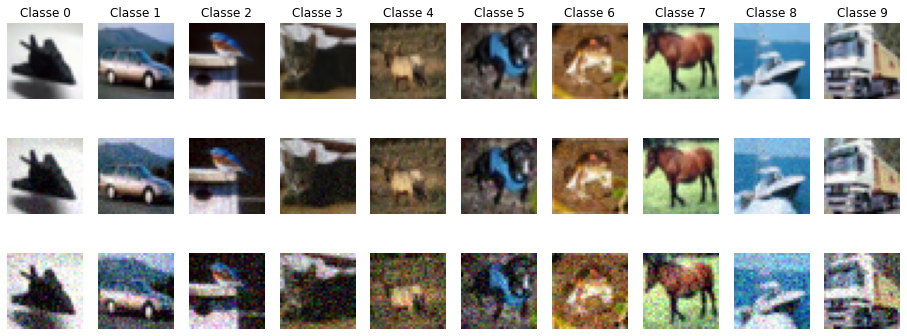

In [31]:
#Plotar imagens cifar 
plt.figure(figsize=(16, 6))
###classe 0
plt.subplot(3,10, 1)
plt.title('Classe 0')
plt.axis('off')
plt.imshow(X_train_cifar[29])
plt.subplot(3,10, 11)
plt.axis('off')
plt.imshow(X_train_cifar_001[29])
plt.subplot(3,10, 21)
plt.axis('off')
plt.imshow(X_train_cifar_01[29])

###classe 1
plt.subplot(3,10, 2)
plt.title('Classe 1')
plt.axis('off')
plt.imshow(X_train_cifar[4])
plt.subplot(3,10, 12)
plt.axis('off')
plt.imshow(X_train_cifar_001[4])
plt.subplot(3,10, 22)
plt.axis('off')
plt.imshow(X_train_cifar_01[4])

###classe 2
plt.subplot(3,10, 3)
plt.title('Classe 2')
plt.axis('off')
plt.imshow(X_train_cifar[13])
plt.subplot(3,10, 13)
plt.axis('off')
plt.imshow(X_train_cifar_001[13])
plt.subplot(3,10, 23)
plt.axis('off')
plt.imshow(X_train_cifar_01[13])

###classe 3
plt.subplot(3,10, 4)
plt.title('Classe 3')
plt.axis('off')
plt.imshow(X_train_cifar[9])
plt.subplot(3,10, 14)
plt.axis('off')
plt.imshow(X_train_cifar_001[9])
plt.subplot(3,10, 24)
plt.axis('off')
plt.imshow(X_train_cifar_01[9])

###classe 4
plt.subplot(3,10, 5)
plt.title('Classe 4')
plt.axis('off')
plt.imshow(X_train_cifar[3])
plt.subplot(3,10, 15)
plt.axis('off')
plt.imshow(X_train_cifar_001[3])
plt.subplot(3,10, 25)
plt.axis('off')
plt.imshow(X_train_cifar_01[3])

###classe 5
plt.subplot(3,10, 6)
plt.title('Classe 5')
plt.axis('off')
plt.imshow(X_train_cifar[27])
plt.subplot(3,10, 16)
plt.axis('off')
plt.imshow(X_train_cifar_001[27])
plt.subplot(3,10, 26)
plt.axis('off')
plt.imshow(X_train_cifar_01[27])

###classe 6
plt.subplot(3,10, 7)
plt.title('Classe 6')
plt.axis('off')
plt.imshow(X_train_cifar[0])
plt.subplot(3,10, 17)
plt.axis('off')
plt.imshow(X_train_cifar_001[0])
plt.subplot(3,10, 27)
plt.axis('off')
plt.imshow(X_train_cifar_01[0])

###classe 7
plt.subplot(3,10, 8)
plt.title('Classe 7')
plt.axis('off')
plt.imshow(X_train_cifar[7])
plt.subplot(3,10, 18)
plt.axis('off')
plt.imshow(X_train_cifar_001[7])
plt.subplot(3,10, 28)
plt.axis('off')
plt.imshow(X_train_cifar_01[7])

###classe 8
plt.subplot(3,10, 9)
plt.title('Classe 8')
plt.axis('off')
plt.imshow(X_train_cifar[8])
plt.subplot(3,10, 19)
plt.axis('off')
plt.imshow(X_train_cifar_001[8])
plt.subplot(3,10, 29)
plt.axis('off')
plt.imshow(X_train_cifar_01[8])

###classe 9
plt.subplot(3,10, 10)
plt.title('Classe 9')
plt.axis('off')
plt.imshow(X_train_cifar[1])
plt.subplot(3,10, 20)
plt.axis('off')
plt.imshow(X_train_cifar_001[1])
plt.subplot(3,10, 30)
plt.axis('off')
plt.imshow(X_train_cifar_01[1])

plt.show()

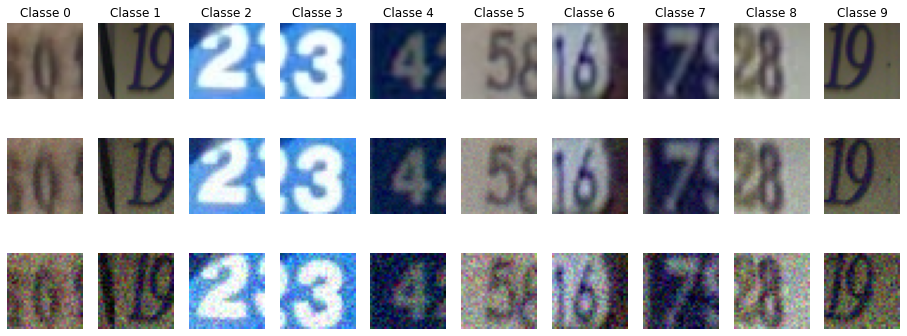

In [48]:
#Plotar imagens svhn 
plt.figure(figsize=(16, 6))
###classe 0
plt.subplot(3,10, 1)
plt.title('Classe 0')
plt.axis('off')
plt.imshow(X_train_svhn[52])
plt.subplot(3,10, 11)
plt.axis('off')
plt.imshow(X_train_svhn_001[52])
plt.subplot(3,10, 21)
plt.axis('off')
plt.imshow(X_train_svhn_01[52])

###classe 1
plt.subplot(3,10, 2)
plt.title('Classe 1')
plt.axis('off')
plt.imshow(X_train_svhn[0])
plt.subplot(3,10, 12)
plt.axis('off')
plt.imshow(X_train_svhn_001[0])
plt.subplot(3,10, 22)
plt.axis('off')
plt.imshow(X_train_svhn_01[0])

###classe 2
plt.subplot(3,10, 3)
plt.title('Classe 2')
plt.axis('off')
plt.imshow(X_train_svhn[2])
plt.subplot(3,10, 13)
plt.axis('off')
plt.imshow(X_train_svhn_001[2])
plt.subplot(3,10, 23)
plt.axis('off')
plt.imshow(X_train_svhn_01[2])

###classe 3
plt.subplot(3,10, 4)
plt.title('Classe 3')
plt.axis('off')
plt.imshow(X_train_svhn[3])
plt.subplot(3,10, 14)
plt.axis('off')
plt.imshow(X_train_svhn_001[3])
plt.subplot(3,10, 24)
plt.axis('off')
plt.imshow(X_train_svhn_01[3])

###classe 4
plt.subplot(3,10, 5)
plt.title('Classe 4')
plt.axis('off')
plt.imshow(X_train_svhn[26])
plt.subplot(3,10, 15)
plt.axis('off')
plt.imshow(X_train_svhn_001[26])
plt.subplot(3,10, 25)
plt.axis('off')
plt.imshow(X_train_svhn_01[26])

###classe 5
plt.subplot(3,10, 6)
plt.title('Classe 5')
plt.axis('off')
plt.imshow(X_train_svhn[28])
plt.subplot(3,10, 16)
plt.axis('off')
plt.imshow(X_train_svhn_001[28])
plt.subplot(3,10, 26)
plt.axis('off')
plt.imshow(X_train_svhn_01[28])

###classe 6
plt.subplot(3,10, 7)
plt.title('Classe 6')
plt.axis('off')
plt.imshow(X_train_svhn[21])
plt.subplot(3,10, 17)
plt.axis('off')
plt.imshow(X_train_svhn_001[21])
plt.subplot(3,10, 27)
plt.axis('off')
plt.imshow(X_train_svhn_01[21])

###classe 7
plt.subplot(3,10, 8)
plt.title('Classe 7')
plt.axis('off')
plt.imshow(X_train_svhn[34])
plt.subplot(3,10, 18)
plt.axis('off')
plt.imshow(X_train_svhn_001[34])
plt.subplot(3,10, 28)
plt.axis('off')
plt.imshow(X_train_svhn_01[34])

###classe 8
plt.subplot(3,10, 9)
plt.title('Classe 8')
plt.axis('off')
plt.imshow(X_train_svhn[13])
plt.subplot(3,10, 19)
plt.axis('off')
plt.imshow(X_train_svhn_001[13])
plt.subplot(3,10, 29)
plt.axis('off')
plt.imshow(X_train_svhn_01[13])

###classe 9
plt.subplot(3,10, 10)
plt.title('Classe 9')
plt.axis('off')
plt.imshow(X_train_svhn[1])
plt.subplot(3,10, 20)
plt.axis('off')
plt.imshow(X_train_svhn_001[1])
plt.subplot(3,10, 30)
plt.axis('off')
plt.imshow(X_train_svhn_01[1])

plt.show()

## Questão 4

In [32]:
#Transformar y_train_cifar, y_test_cifar, y_train_svhn, y_test_svhn com to_categorical
y_train_cifar = to_categorical(y_train_cifar,10)
y_test_cifar = to_categorical(y_test_cifar,10)

In [33]:
y_train_svhn = to_categorical(y_train_svhn,10)
y_test_svhn = to_categorical(y_test_svhn,10)

### Treinar modelos CIFAR-10

In [34]:
#Cifar original
modeloCifar = criarModelo()
modeloCifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
modeloCifar.fit(X_train_cifar, y_train_cifar, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 8ms/step - loss: 1.5803 - accuracy: 0.4229
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2339 - accuracy: 0.5576
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0797 - accuracy: 0.6213
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9880 - accuracy: 0.6540
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9250 - accuracy: 0.6760
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8771 - accuracy: 0.6942
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8364 - accuracy: 0.7097
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8050 - accuracy: 0.7198
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7747 - accuracy: 0.7296
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [38]:
#Cifar 0.001
modeloCifar_001 = criarModelo()
modeloCifar_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
modeloCifar_001.fit(X_train_cifar_001, y_train_cifar, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6079 - accuracy: 0.4129
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2595 - accuracy: 0.5515
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1164 - accuracy: 0.6071
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0334 - accuracy: 0.6344
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9651 - accuracy: 0.6598
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9168 - accuracy: 0.6775
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8721 - accuracy: 0.6935
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8385 - accuracy: 0.7053
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8076 - accuracy: 0.7172
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - l

In [42]:
#Cifar 0.01
modeloCifar_01 = criarModelo()
modeloCifar_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
modeloCifar_01.fit(X_train_cifar_01, y_train_cifar, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6507 - accuracy: 0.3995
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3207 - accuracy: 0.5267
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1811 - accuracy: 0.5763
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0963 - accuracy: 0.6109
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0344 - accuracy: 0.6348
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9893 - accuracy: 0.6495
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9532 - accuracy: 0.6631
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9159 - accuracy: 0.6752
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8888 - accuracy: 0.6848
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

### Treinar modelos SVHN

In [49]:
#SVHN original
modeloSvhn = criarModelo()
modeloSvhn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
modeloSvhn.fit(X_train_svhn, y_train_svhn, epochs=10)

Epoch 1/10
2290/2290 [==============================] - 20s 8ms/step - loss: 0.8776 - accuracy: 0.7174
Epoch 2/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.4284 - accuracy: 0.8716
Epoch 3/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.3571 - accuracy: 0.8958
Epoch 4/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3211 - accuracy: 0.9055
Epoch 5/10
2290/2290 [==============================] - 17s 7ms/step - loss: 0.2949 - accuracy: 0.9129
Epoch 6/10
2290/2290 [==============================] - 17s 8ms/step - loss: 0.2738 - accuracy: 0.9194
Epoch 7/10
2290/2290 [==============================] - 17s 8ms/step - loss: 0.2580 - accuracy: 0.9232
Epoch 8/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.2472 - accuracy: 0.9252
Epoch 9/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.2384 - accuracy: 0.9290
Epoch 10/10
2290/2290 [==============================] - 18s 8ms/step - l

In [53]:
#SVHN 0.001
modeloSvhn_001 = criarModelo()
modeloSvhn_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
modeloSvhn_001.fit(X_train_svhn_001, y_train_svhn, epochs=10)

Epoch 1/10
2290/2290 [==============================] - 19s 8ms/step - loss: 1.0390 - accuracy: 0.6593
Epoch 2/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.4920 - accuracy: 0.8523
Epoch 3/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.4040 - accuracy: 0.8801
Epoch 4/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3608 - accuracy: 0.8914
Epoch 5/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3313 - accuracy: 0.9005
Epoch 6/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3084 - accuracy: 0.9078
Epoch 7/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.2927 - accuracy: 0.9126 0s - los
Epoch 8/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.2772 - accuracy: 0.9168
Epoch 9/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.2673 - accuracy: 0.9192
Epoch 10/10
2290/2290 [==============================] - 18s 8ms

In [61]:
#SVHN 0.01
modeloSvhn_01 = criarModelo()
modeloSvhn_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
modeloSvhn_01.fit(X_train_svhn_01, y_train_svhn, epochs=10)

Epoch 1/10
2290/2290 [==============================] - 19s 8ms/step - loss: 1.0975 - accuracy: 0.6341
Epoch 2/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.5420 - accuracy: 0.8336
Epoch 3/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.4668 - accuracy: 0.8572
Epoch 4/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.4293 - accuracy: 0.8679
Epoch 5/10
2290/2290 [==============================] - 17s 8ms/step - loss: 0.4025 - accuracy: 0.8757
Epoch 6/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.3826 - accuracy: 0.8827
Epoch 7/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.3677 - accuracy: 0.8859
Epoch 8/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.3546 - accuracy: 0.8896
Epoch 9/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3414 - accuracy: 0.8941
Epoch 10/10
2290/2290 [==============================] - 19s 8ms/step - l

## Questão 5

### Avaliar modelos CIFAR-10

In [36]:
#Computar acurácia para modelo cifar original para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloCifar.evaluate(X_test_cifar, y_test_cifar)
acc001=modeloCifar.evaluate(X_test_cifar_001, y_test_cifar)
acc01=modeloCifar.evaluate(X_test_cifar_01, y_test_cifar)
print('\nAcurácia modelo Cifar treinado com dataset original:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

313/313 [==============================] - 1s 4ms/step - loss: 1.6336 - accuracy: 0.4756

Acurácia modelo Cifar treinado com dataset original:
Acurácia conjunto de teste original: 68.13%
Acurácia conjunto de teste com ruído 0.001: 67.15%
Acurácia conjunto de teste com ruído 0.01: 47.56%


In [40]:
#Computar acurácia para modelo cifar 0.001 para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloCifar_001.evaluate(X_test_cifar, y_test_cifar)
acc001=modeloCifar_001.evaluate(X_test_cifar_001, y_test_cifar)
acc01=modeloCifar_001.evaluate(X_test_cifar_01, y_test_cifar)
print('\nAcurácia modelo Cifar treinado com ruído 0.001:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

313/313 [==============================] - 1s 4ms/step - loss: 1.2455 - accuracy: 0.5728

Acurácia modelo Cifar treinado com ruído 0.001:
Acurácia conjunto de teste original: 67.43%
Acurácia conjunto de teste com ruído 0.001: 67.48%
Acurácia conjunto de teste com ruído 0.01: 57.28%


In [44]:
#Computar acurácia para modelo cifar 0.01 para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloCifar_01.evaluate(X_test_cifar, y_test_cifar)
acc001=modeloCifar_01.evaluate(X_test_cifar_001, y_test_cifar)
acc01=modeloCifar_01.evaluate(X_test_cifar_01, y_test_cifar)
print('\nAcurácia modelo Cifar treinado com ruído 0.01:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

313/313 [==============================] - 1s 5ms/step - loss: 1.0377 - accuracy: 0.6420

Acurácia modelo Cifar treinado com ruído 0.01:
Acurácia conjunto de teste original: 61.98%
Acurácia conjunto de teste com ruído 0.001: 62.47%
Acurácia conjunto de teste com ruído 0.01: 64.20%


### Avaliar modelos SVHN

In [51]:
#Computar acurácia para modelo svhn original para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloSvhn.evaluate(X_test_svhn, y_test_svhn)
acc001=modeloSvhn.evaluate(X_test_svhn_001, y_test_svhn)
acc01=modeloSvhn.evaluate(X_test_svhn_01, y_test_svhn)
print('\nAcurácia modelo SVHN treinado com dataset original:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

814/814 [==============================] - 4s 4ms/step - loss: 0.7029 - accuracy: 0.7835

Acurácia modelo SVHN treinado com dataset original:
Acurácia conjunto de teste original: 90.34%
Acurácia conjunto de teste com ruído 0.001: 89.24%
Acurácia conjunto de teste com ruído 0.01: 78.35%


In [55]:
#Computar acurácia para modelo svhn 0.001 para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloSvhn_001.evaluate(X_test_svhn, y_test_svhn)
acc001=modeloSvhn_001.evaluate(X_test_svhn_001, y_test_svhn)
acc01=modeloSvhn_001.evaluate(X_test_svhn_01, y_test_svhn)
print('\nAcurácia modelo SVHN treinado com ruído 0.001:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

814/814 [==============================] - 4s 4ms/step - loss: 0.6608 - accuracy: 0.7927

Acurácia modelo SVHN treinado com ruído 0.001:
Acurácia conjunto de teste original: 89.87%
Acurácia conjunto de teste com ruído 0.001: 89.24%
Acurácia conjunto de teste com ruído 0.01: 79.27%


In [63]:
#Computar acurácia para modelo svhn 0.01 para os 3 conjuntos de teste(original, 0.001 e 0.01)
accOriginal=modeloSvhn_01.evaluate(X_test_svhn, y_test_svhn)
acc001=modeloSvhn_01.evaluate(X_test_svhn_001, y_test_svhn)
acc01=modeloSvhn_01.evaluate(X_test_svhn_01, y_test_svhn)
print('\nAcurácia modelo SVHN treinado com ruído 0.01:')
print('Acurácia conjunto de teste original: %.2f%s' % (accOriginal[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.001: %.2f%s' % (acc001[1]*100,'%'))
print('Acurácia conjunto de teste com ruído 0.01: %.2f%s' % (acc01[1]*100,'%'))

814/814 [==============================] - 3s 4ms/step - loss: 0.4376 - accuracy: 0.8731

Acurácia modelo SVHN treinado com ruído 0.01:
Acurácia conjunto de teste original: 89.40%
Acurácia conjunto de teste com ruído 0.001: 89.16%
Acurácia conjunto de teste com ruído 0.01: 87.31%


A afirmação que mais explica as variações nas acurácias é a afirmação ii. 

Os modelos treinados com os dados originais e com ruído gaussiano de variância 0.001 foram avaliados com os conjuntos de testes e, conforme pode ser visto nos resultados obtidos, o conjunto de teste com maior ruído(variância 0.01) provoca grande diminuição na acurácia desses modelos, devido a esse conjunto ser bastante diferente do treinamento.